# 0. Quick Intro on Jupyter and Python

Let's first take a look at the editor "Jupyter Notebook" that we are using today.

## The Jupyter Notebook: 
* An open source web application 
* To create and share documents that contain live code, equations, visualizations, and text
* Ships with the IPython kernel, supports over 100 other kernels (R, Julia, etc.)


### Running Cells:

* A Notebook’s cell defaults to using code whenever you first create one
* Uses the kernel that you chose when you started your Notebook
* Started with Python 3 as kernel, one can write Python code in the code cells
* To execute a cell, you can just select the cell and click the Run button (keyboard press Shift+Enter)
* The primary cell types are the Code and Markdown cell types

### More Functionalities:

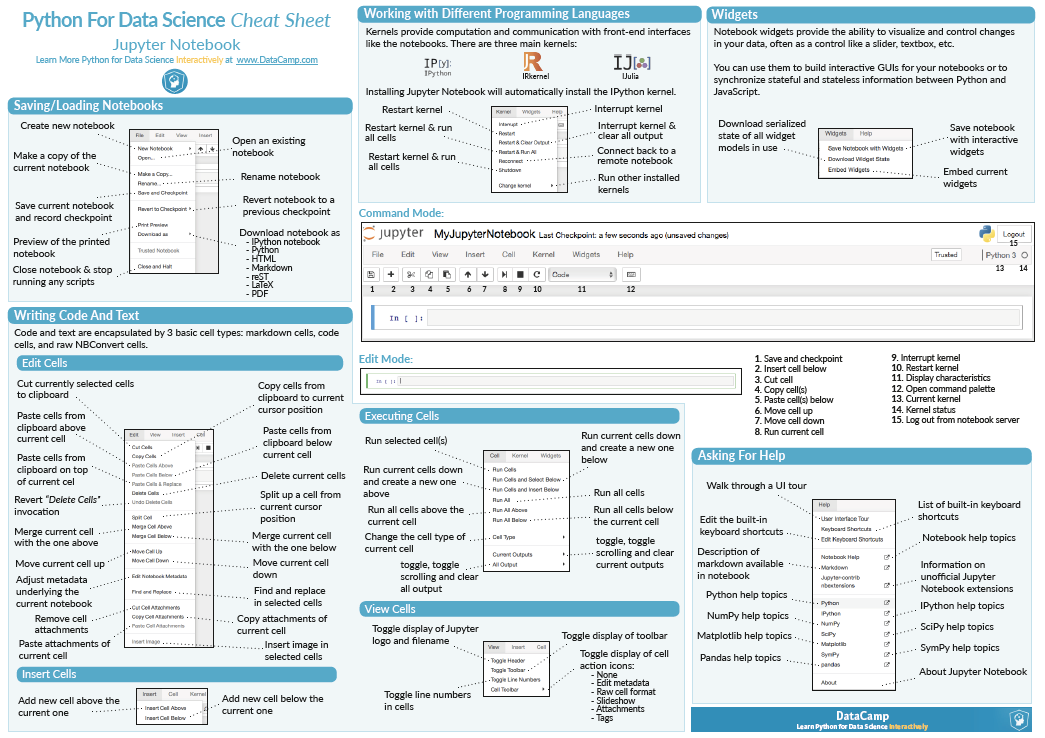

## Useful References:
* [Jupyter Cheatsheet](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)
* [Python Cheatsheet](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf)
* [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

# 1. A Quick Running Example of Time Series Forecasting


### Dataset - [Walmart Store Sales Forecasting](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data)

- Historical sales data for 45 Walmart stores located in different regions. 
- Each store contains a number of departments, and we are interested in predicting the department-wide sales for each store.
- Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. 
- We have formatted the original data in a csv file for easier manipulation.

### Pandas 
- pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.
- Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases.
- Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets.
- Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data. https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#time-series-related

#### [Pandas Cheatsheet](https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf)

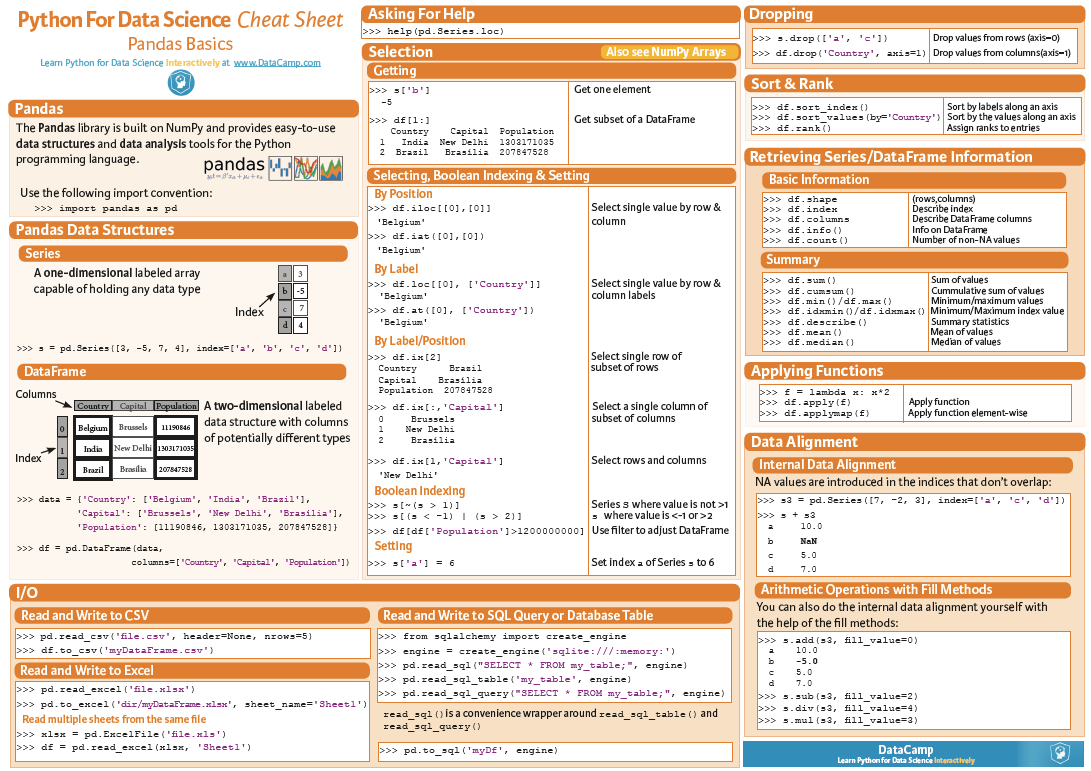


In [1]:
import pandas as pd

In [2]:
ts = pd.read_csv('../data/sales_weekly.csv', index_col='ds')
print("Number of rows: " + str(ts.shape[0]) + "; Number of columns: " + str(ts.shape[1]))

Number of rows: 143; Number of columns: 3331


In [3]:
ts.head(5)

10_1     10_10     10_11     10_12     10_13     10_14  \
ds                                                                       
2010-02-05  40212.84  48027.87  36705.57  10365.86  74020.63  55033.94   
2010-02-12  67699.32  50595.72  31052.34   9375.25  69145.42  51167.46   
2010-02-19  49748.33  51199.72  33224.65  11032.90  68060.96  49011.24   
2010-02-26  33601.22  50028.83  29268.91  11058.90  71517.99  49829.71   
2010-03-05  36572.44  49892.15  31934.99  11033.07  70279.43  46865.98   

               10_16     10_17     10_18    10_19  ...       9_9     9_90  \
ds                                                 ...                      
2010-02-05  25694.43  36872.18   8912.27  4046.34  ...   7245.32  2335.92   
2010-02-12  24555.89  34782.91  28176.35  3602.73  ...   6556.94  2486.18   
2010-02-19  33321.92  34512.54  16244.14  3617.85  ...   7301.19  2452.70   
2010-02-26  27773.67  31175.51    916.25  4207.51  ...   7814.18  2386.49   
2010-03-05  35227.56  33143.03   1426.47  3623.52  ...  10540.89  2369.01   

              9_91      9_92  9_93     9_94      9_95     9_96    9_97  9_98  
ds                                                                            
2010-02-05  292.64  11620.09   0.0     0.00  23292.10  2438.08  668.48   0.0  
2010-02-12  544.74  11080.50   0.0   982.50  22317.38  2304.09  766.93   0.0  
2010-02-19  424.26  10233.49   0.0  2163.75  20694.32  1944.11  607.02   0.0  
2010-02-26  470.43  10786.42   0.0     0.00  21780.08  2423.55  580.74   0.0  
2010-03-05  679.47  11176.21   0.0     0.00  22187.57  2591.28  371.05   0.0  

[5 rows x 3331 columns]

## 1.1 Explore the Data with Visulization

- The first thing to do in any data analysis task is to plot the data. 
- It enable us to observe patterns, unusual observations, changes over time, and relationships between variables. 
- The features that are seen in plots of the data must then be incorporated, as much as possible, into the forecasting methods to be used. Just as the type of data determines what forecasting method to use, it also determines what graphs are appropriate. 

[Choosing a Python Visualization Tool](https://pbpython.com/python-vis-flowchart.html)

In [4]:
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()

In [5]:
ts['ds'] = ts.index
ts['ds'] = pd.to_datetime(ts['ds'])
ts = ts.set_index('ds')

In [6]:
data_10_10 = go.Scatter(x=ts.index, y=ts['10_10'], name='10_10')
data_10_13 = go.Scatter(x=ts.index, y=ts['10_13'], name='10_13')

fig = tools.make_subplots(rows=2, cols=1)
fig.append_trace(data_10_10, 1, 1)
fig.append_trace(data_10_13, 2, 1)

fig['layout'].update(height=400, width=900, title='Data Visualization')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



## 1.2 Get Better Understanding of the Data Using Basic Stats 

- Essentials: type, unique values, missing values, most frequent values, etc.
- Quantile statistics like minimum value, Q1, median, Q3, maximum, range, etc.
- Descriptive statistics like mean, mode, standard deviation, etc.

In [7]:
import ts_profiling

In [8]:
ts_profiling.ProfileReport(ts[['10_10','10_13']], bins=50, check_correlation=False, check_recoded=False)

/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



### Correlation between series

- Correlation: It is common to compute correlation coefficients to measure the strength of the relationship between two variables. 

- The value of  always lies between -1 and 1 with negative values indicating a negative relationship and positive values indicating a positive relationship. The correlation coefficient only measures the strength of the linear relationship.

In [9]:
corr = ts.corr('pearson')
print("Number of rows: " + str(corr.shape[0]) + "; Number of columns: " + str(corr.shape[1]))

Number of rows: 3331; Number of columns: 3331


In [10]:
corr.head(10)

10_1     10_10     10_11     10_12     10_13     10_14     10_16  \
10_1   1.000000  0.022750  0.028081 -0.196018 -0.159145  0.554914 -0.243487   
10_10  0.022750  1.000000  0.366466  0.252064  0.091155  0.087133  0.311280   
10_11  0.028081  0.366466  1.000000 -0.022333 -0.079349  0.312819  0.104078   
10_12 -0.196018  0.252064 -0.022333  1.000000  0.331658 -0.335890  0.642497   
10_13 -0.159145  0.091155 -0.079349  0.331658  1.000000 -0.118252  0.117482   
10_14  0.554914  0.087133  0.312819 -0.335890 -0.118252  1.000000 -0.400868   
10_16 -0.243487  0.311280  0.104078  0.642497  0.117482 -0.400868  1.000000   
10_17  0.495490  0.237966  0.232333 -0.164016  0.152021  0.858142 -0.258267   
10_18  0.645612 -0.162897  0.284750 -0.444413 -0.341505  0.630749 -0.578346   
10_19  0.170997 -0.025450 -0.045845  0.118349  0.304676  0.157862 -0.200772   

          10_17     10_18     10_19  ...       9_9      9_90      9_91  \
10_1   0.495490  0.645612  0.170997  ...  0.081592  0.102989 -0.318772   
10_10  0.237966 -0.162897 -0.025450  ...  0.376093  0.155871  0.439375   
10_11  0.232333  0.284750 -0.045845  ...  0.097370  0.069777  0.331488   
10_12 -0.164016 -0.444413  0.118349  ... -0.036118 -0.274941  0.171408   
10_13  0.152021 -0.341505  0.304676  ... -0.116508 -0.469692 -0.207286   
10_14  0.858142  0.630749  0.157862  ...  0.123560  0.164552 -0.259560   
10_16 -0.258267 -0.578346 -0.200772  ...  0.142500 -0.098908  0.329604   
10_17  1.000000  0.440138  0.196332  ...  0.103002  0.045879 -0.319402   
10_18  0.440138  1.000000  0.251674  ...  0.014624  0.142010 -0.298468   
10_19  0.196332  0.251674  1.000000  ... -0.121650 -0.309173 -0.272410   

           9_92      9_93      9_94      9_95      9_96      9_97      9_98  
10_1   0.191547  0.328917 -0.003381 -0.256559 -0.175354  0.059318  0.255612  
10_10  0.112247  0.057026 -0.046179  0.409691  0.246678  0.082188 -0.003319  
10_11  0.037797 -0.030596 -0.098727  0.148504  0.167798 -0.025745  0.257932  
10_12 -0.369399  0.141559  0.030461  0.130318  0.065170  0.221745 -0.320340  
10_13 -0.412293  0.044746 -0.049902 -0.247460 -0.313192  0.372282 -0.306643  
10_14  0.342244  0.007260 -0.012782 -0.325426 -0.101605  0.181035  0.421369  
10_16 -0.367008  0.117913  0.163053  0.424643  0.130751 -0.002160 -0.350688  
10_17  0.224237  0.007609  0.061930 -0.313833 -0.223304  0.329172  0.279753  
10_18  0.318117  0.085739 -0.056957 -0.368435 -0.174401 -0.010871  0.592353  
10_19 -0.164367  0.000234 -0.111299 -0.354927 -0.263033  0.283737  0.088861  

[10 rows x 3331 columns]

In [11]:
trace1 = go.Scatter(x = ts['10_17'], y = ts['10_14'], mode = 'markers')
trace2 = go.Scatter(x = ts['10_12'], y = ts['10_18'], mode = 'markers')
fig = tools.make_subplots(rows=1, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=400, width=900, title='Scatter Plot')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 1.3 Trend, Seasonality & Residual

##### \[Definition from https://otexts.com/fpp2/ a textbook by Prof. Rob J Hyndman and Prof. George Athanasopoulos\]

#### Trend: 
* A trend exists when there is a long-term increase or decrease in the data. 
* It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend.

#### Seasonal: 

* A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency. 

#### Additive vs. Multiplicative
- The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

- An alternative to using a multiplicative decomposition is to first transform the data until the variation in the series appears to be stable over time, then use an additive decomposition. When a log transformation has been used, this is equivalent to using a multiplicative decomposition.

In [12]:
import statsmodels.api as sm

#### Time Series analysis (TSA) https://www.statsmodels.org/dev/tsa.html#

statsmodels.tsa contains model classes and functions that are useful for time series analysis. 

In [13]:
decomposition = sm.tsa.seasonal_decompose(ts['10_10'], model='additive', freq=13)

In [14]:
data0 = go.Scatter(x=ts['10_10'].index, y=ts['10_10'].values, name='Data')
data1 = go.Scatter(x=decomposition.trend.index, y=decomposition.trend.values, name='Trend')
data2 = go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal.values, name='Seasonality')
data3 = go.Scatter(x=decomposition.resid.index, y=decomposition.resid.values, name='Residual')

fig = tools.make_subplots(rows=4, cols=1)
fig.append_trace(data0, 1, 1)
fig.append_trace(data1, 2, 1)
fig.append_trace(data2, 3, 1)
fig.append_trace(data3, 4, 1)

fig['layout'].update(height=500, width=900, title='Classic MA Decomposation')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]



### Comments on classical decomposition

While classical decomposition is still widely used, it has some issues as summarised below:

* The classical decomposition methods assume that the seasonal component repeats, and are unable to capture seasonal changes over time.
* The estimate of the trend-cycle is unavailable for the first few and last few observations.
* The classical method is not robust to outliner values.

### STL Method (Seasonal and Trend decomposition using Loess)

Loess regression is a nonparametric technique that uses local weighted regression to fit a smooth curve through points in a scatter plot. Loess curves are can reveal trends and cycles in data that might be difficult to model with a parametric curve. 

STL has several advantages over the classical decomposition method:

* STL will handle any type of seasonality, not only monthly and quarterly data.

* The seasonal component is allowed to change over time.

* It can be robust to outliers, so that occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.

On the other hand, STL has some disadvantages:
* STL does not handle trading day or calendar variation automatically, and it only provides facilities for additive decompositions.
* It is possible to obtain a multiplicative decomposition by first taking logs of the data, then back-transforming the components. 


In [15]:
from stldecompose import decompose

In [16]:
stl = decompose(ts['10_10'], period=13)

In [17]:
data0 = go.Scatter(x=ts['10_10'].index, y=ts['10_10'].values, name='Data')
data1 = go.Scatter(x=stl.trend.index, y=stl.trend.values, name='Trend')
data2 = go.Scatter(x=stl.seasonal.index, y=stl.seasonal.values, name='Seasonality')
data3 = go.Scatter(x=stl.resid.index, y=stl.resid.values, name='Residual')

fig = tools.make_subplots(rows=4, cols=1)
fig.append_trace(data0, 1, 1)
fig.append_trace(data1, 2, 1)
fig.append_trace(data2, 3, 1)
fig.append_trace(data3, 4, 1)

fig['layout'].update(height=600, width=900, title='STL Decomposation')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]



### Residuals

The “residuals” in a time series model are what is left over after fitting a model. For many (but not all) time series models, the residuals are equal to the difference between the observations and the corresponding fitted values. Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will yield residuals with the following properties:

- The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.

- The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

Any forecasting method that does not satisfy these properties can be improved. It is possible to have several different forecasting methods for the same data set, all of which satisfy these properties. Checking these properties is important in order to see whether a method is using all of the available information, but it is not a good way to select a forecasting method.

If either of these properties is not satisfied, then the forecasting method can be modified to give better forecasts. Adjusting for bias is easy: if the residuals have mean then simply add to all forecasts and the bias problem is solved. Fixing the correlation problem is harder.

In [65]:
stl.resid.values.mean()

-221.2797959037804

In [63]:
kpss_stat, p_value, lags, crit = sm.tsa.stattools.kpss(stl.resid.values)
print("kpss: " + str(kpss_stat) + "; p_value: " + str(p_value) +"; lags: " + str(lags) +"; crit: " + str(crit))

kpss: 0.04297721487170138; p_value: 0.1; lags: 14; crit: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning:

p-value is greater than the indicated p-value



## 1.4 Using STL to Forecast

To forecast a decomposed time series, we forecast the seasonal component, and the seasonally adjusted component separately. It is usually assumed that the seasonal component is unchanging, or changing extremely slowly, so it is forecast by simply taking the last year of the estimated component. 

- For naïve forecasts, we simply set all forecasts to be the value of the last observation. 
- Seasonal naïve is useful for highly seasonal data. We set each forecast to be equal to the last observed value from the same season of the year.
- Drift is a variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data.

In [18]:
from stldecompose import forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         seasonal_naive)

In [19]:
train_ts = ts['10_10'][0:-39]
validate_ts = ts['10_10'][-39:]

In [20]:
stl = decompose(train_ts, period=13)
fcast_n = forecast(stl, steps=39, fc_func=naive, seasonal=True)
fcast_d = forecast(stl, steps=39, fc_func=drift, seasonal=True)

In [21]:
layout = go.Layout(autosize=False, width=900, height=300)
data = [go.Scatter(x=fcast_n.index, y=fcast_n['naive+seasonal'], name='forecast_stl_naive'),
       go.Scatter(x=validate_ts.index, y=validate_ts, name='real')]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [22]:
layout = go.Layout(autosize=False, width=900, height=300)
data = [go.Scatter(x=fcast_d.index, y=fcast_d['drift+seasonal'], name='forecast_stl_drift'),
       go.Scatter(x=validate_ts.index, y=validate_ts, name='real')]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## 1.5 Measure Forecast Accurancy

A few commonly used measurement of accurancy/error:

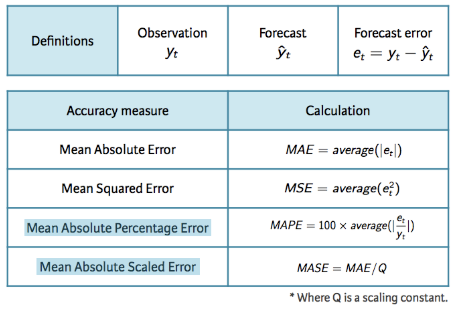

\[Image from https://uc-r.github.io/ts_benchmarking#accuracy \]

In [23]:
import numpy as np
def mape(predictions, actuals):
    """Mean absolute percentage error"""
    return (np.absolute((predictions - actuals) / actuals)).mean()

In [24]:
mape(fcast_n['naive+seasonal'],validate_ts)

0.09298903112363527

In [26]:
mape(fcast_d['drift+seasonal'],validate_ts)

0.151294794656192

## 1.6 Forecast Workflow

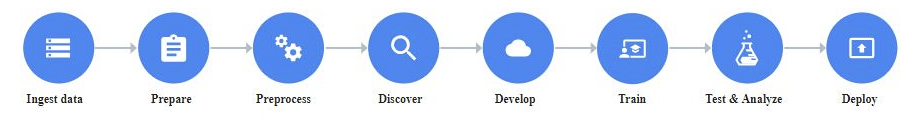

## 2. Using Prophet to Forecast

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects ([FB Prophet Github Page](https://facebook.github.io/prophet/))


- It works best with time series that have strong seasonal effects and several seasons of historical data. 
- Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
- The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. One can use human-interpretable parameters to improve your forecast by adding your domain knowledge.

Prophet consider four major factors: (1) Growth; (2) Seasonality; (3) Holiday; (4) Residual

- Growth can be modeled by considering: (1) capacity (i.e., max and min of trend); (2) change points; (3) Additive or Multiplicative.
- Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.
- Time series may frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.



In [27]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

In [28]:
ts_prophet = ts
ts_prophet['ds']=ts_prophet.index
train_ts=ts_prophet[['ds','10_10']][0:-39]
train_ts.columns = ['ds','y']
train_ts.index.names=['index']

In [29]:
model = Prophet(yearly_seasonality=True)
model.fit(train_ts)

/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [30]:
future = model.make_future_dataframe(39, freq='W-FRI', include_history=False)
forecast = model.predict(future)

In [31]:
forecast.head(5)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2012-02-03  48499.105234  43072.519634  49617.933218  48499.092831   
1 2012-02-10  48520.407963  46473.274557  53320.234589  48520.093832   
2 2012-02-17  48541.710691  47568.682067  54048.729219  48540.977743   
3 2012-02-24  48563.013420  47694.162574  54249.223083  48561.575134   
4 2012-03-02  48584.316149  47899.911689  54223.975521  48582.161681   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  48499.125484    -2178.484014          -2178.484014          -2178.484014   
1  48520.767920     1157.710345           1157.710345           1157.710345   
2  48542.641820     2343.301219           2343.301219           2343.301219   
3  48564.643902     2410.556620           2410.556620           2410.556620   
4  48586.813712     2413.311401           2413.311401           2413.311401   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -2178.484014  -2178.484014  -2178.484014                   0.0   
1  1157.710345   1157.710345   1157.710345                   0.0   
2  2343.301219   2343.301219   2343.301219                   0.0   
3  2410.556620   2410.556620   2410.556620                   0.0   
4  2413.311401   2413.311401   2413.311401                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  46320.621219  
1                         0.0                         0.0  49678.118308  
2                         0.0                         0.0  50885.011911  
3                         0.0                         0.0  50973.570040  
4                         0.0                         0.0  50997.627550

In [32]:
layout = go.Layout(autosize=False, width=1000, height=300)
data = [go.Scatter(x=validate_ts.index, y=validate_ts, name='real'),
       go.Scatter(x=validate_ts.index, y=forecast['yhat'], name='forecast'),
       go.Scatter(x=validate_ts.index, y=forecast['yhat_lower'], name='forecast_lower'),
       go.Scatter(x=validate_ts.index, y=forecast['yhat_upper'], name='forecast_upper')]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [33]:
mape(forecast['yhat'].values,validate_ts.values)

0.047708144972639796

### Predication Interval

A prediction interval gives an interval within which we expect y to lie with a specified probability. For example, assuming that the forecast errors are normally distributed. There are three sources of uncertainty in the forecast: 
- uncertainty in the trend; 
- uncertainty in the seasonality estimates;
- additional observation noise.

/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



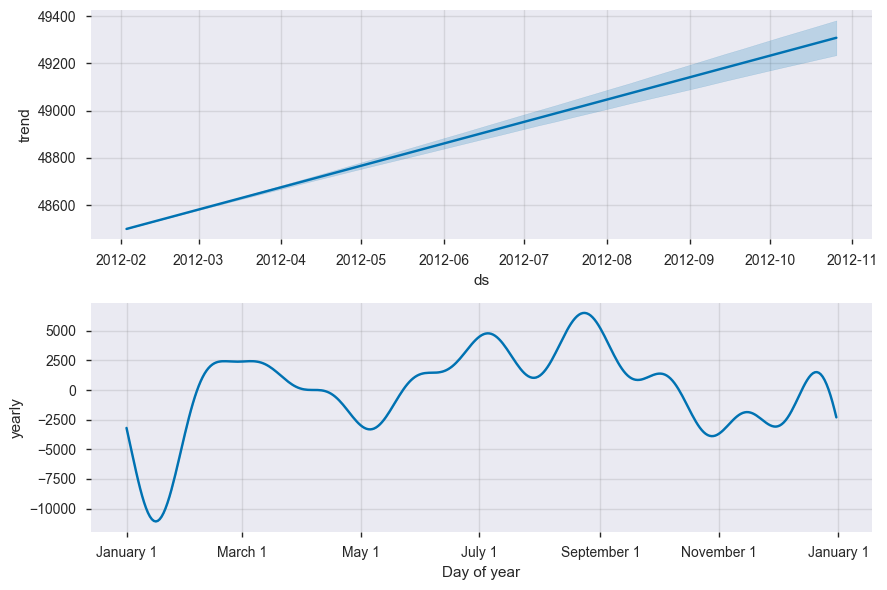

In [34]:
fig = model.plot_components(forecast)

In [36]:
from fbprophet.diagnostics import cross_validation

In [39]:
df_cv = cross_validation(model, initial='364 days', horizon = '273 days', period='28 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2011-02-04 00:00:00 and 2011-04-29 00:00:00
/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

/Users/jian.chang/.conda/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In fu

In [40]:
df_cv.head(10)

ds          yhat    yhat_lower    yhat_upper         y     cutoff
0 2011-02-11  46043.451962  42997.142563  48818.593862  46658.45 2011-02-04
1 2011-02-18  47086.196945  44088.203498  49779.361700  49928.03 2011-02-04
2 2011-02-25  46396.520648  43525.845278  49571.818347  49202.67 2011-02-04
3 2011-03-04  45268.606034  42262.008410  48126.456546  48721.46 2011-02-04
4 2011-03-11  44698.041567  41850.551985  47811.133276  47032.62 2011-02-04
5 2011-03-18  44675.657480  41693.343701  47715.425899  51214.20 2011-02-04
6 2011-03-25  44545.816274  41555.241711  47297.500440  49197.84 2011-02-04
7 2011-04-01  43819.651719  40877.089346  46715.322831  44794.47 2011-02-04
8 2011-04-08  42578.209075  39813.066253  45529.787381  47305.78 2011-02-04
9 2011-04-15  41244.686411  38383.092631  44135.011346  47248.87 2011-02-04

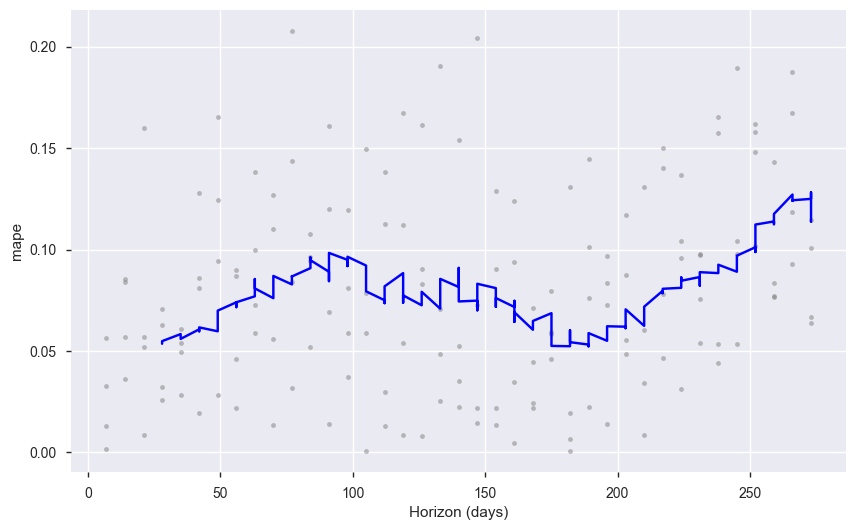

In [43]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',rolling_window=0.1)

## Quick Recap